**Importing required libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf 
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

pd.set_option('display.max_columns',None)

import warnings
warnings.filterwarnings('ignore')

**Load Data**

In [2]:
df = pd.read_csv('breastCancer.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
#Removing Unnecessary columns from dataset

df.drop(['id', 'Unnamed: 32'],axis = 1, inplace = True)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


**We see there's only 1 column, which has object object datatype, so we'll convert into int**

In [6]:
df['diagnosis'].replace({'M':0, 'B':1},inplace=True)

In [7]:
df[1:].describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.00000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000
mean,0.628521,14.120491,19.305335,91.914754,654.279754,0.096321,0.104036,0.088427,0.048746,0.181055,0.062770,0.403958,1.217402,2.855984,40.138025,0.007042,0.025437,0.031855,0.011789,0.020526,0.003791,16.25315,25.691919,107.125053,878.578873,0.132316,0.253541,0.271414,0.114341,0.289776,0.083884
std,0.483626,3.523416,4.288506,24.285848,351.923751,0.014046,0.052355,0.079294,0.038617,0.027319,0.007035,0.276038,0.551979,2.009288,45.282406,0.003005,0.017897,0.030199,0.006173,0.008264,0.002646,4.82232,6.141662,33.474687,567.846267,0.022818,0.156523,0.207989,0.065484,0.061508,0.018017
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.93000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.697500,16.177500,75.135000,420.175000,0.086290,0.064815,0.029540,0.020310,0.161900,0.057697,0.232375,0.833150,1.605000,17.850000,0.005166,0.013048,0.015062,0.007634,0.015128,0.002244,13.01000,21.095000,84.102500,514.975000,0.116600,0.146900,0.114475,0.064730,0.250350,0.071412
50%,1.000000,13.355000,18.855000,86.210000,548.750000,0.095865,0.092525,0.061400,0.033455,0.179200,0.061515,0.323950,1.109500,2.285500,24.485000,0.006374,0.020435,0.025875,0.010920,0.018725,0.003162,14.96500,25.425000,97.655000,685.550000,0.131300,0.211850,0.226550,0.099840,0.282050,0.080015
75%,1.000000,15.780000,21.802500,103.875000,782.625000,0.105300,0.130400,0.129650,0.073730,0.195625,0.066120,0.477325,1.474250,3.336750,45.017500,0.008151,0.032218,0.041765,0.014710,0.023397,0.004526,18.76750,29.757500,125.175000,1073.500000,0.146000,0.337600,0.381400,0.161325,0.317675,0.092065
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.04000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


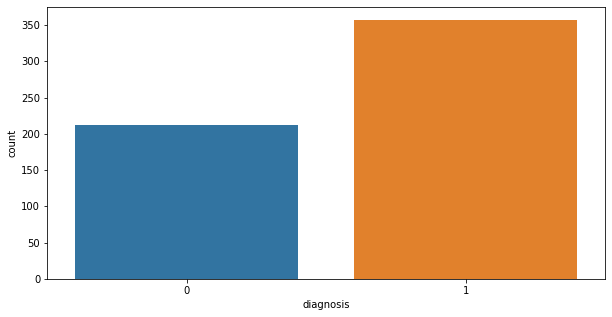

In [8]:
plt.figure(figsize = (10,5))
sns.countplot(df['diagnosis'])
plt.show()

**We have 357 Benign and 212 malignant cancer class in the dataset**

In [9]:
X = df.values[:, 1:]
y = df.values[:,0]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0)

In [11]:
X_train.shape, y_train.shape

((455, 30), (455,))

In [12]:
X_test.shape, y_test.shape

((114, 30), (114,))

In [13]:
# Scale the values

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Building ANN**

In [14]:
model = Sequential()

model.add(Flatten(input_shape = (30,)))

model.add(Dense(16, kernel_initializer = 'random_uniform', activation='relu'))

model.add(Dense(16, activation='relu'))

model.add(Dense(1, activation='sigmoid'))        


model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 30)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                496       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________


In [15]:
checkpoint = ModelCheckpoint("ANN_BreastCancer.hdf5", monitor='loss', verbose=1, save_best_only=True, mode='auto')

history = model.fit(X_train, y_train, validation_data= (X_test, y_test), epochs= 100, 
                    verbose = 1, callbacks= [checkpoint])

Epoch 1/100
15/15 [==============================] - 1s 52ms/step - loss: 0.6643 - accuracy: 0.7933 - val_loss: 0.5703 - val_accuracy: 0.9561

Epoch 00001: loss improved from inf to 0.64179, saving model to ANN_BreastCancer.hdf5
Epoch 2/100
15/15 [==============================] - 0s 13ms/step - loss: 0.5379 - accuracy: 0.9335 - val_loss: 0.4268 - val_accuracy: 0.9298

Epoch 00002: loss improved from 0.64179 to 0.50460, saving model to ANN_BreastCancer.hdf5
Epoch 3/100
15/15 [==============================] - 0s 8ms/step - loss: 0.3875 - accuracy: 0.9419 - val_loss: 0.3213 - val_accuracy: 0.9298

Epoch 00003: loss improved from 0.50460 to 0.36866, saving model to ANN_BreastCancer.hdf5
Epoch 4/100
15/15 [==============================] - 0s 7ms/step - loss: 0.2751 - accuracy: 0.9590 - val_loss: 0.2517 - val_accuracy: 0.9211

Epoch 00004: loss improved from 0.36866 to 0.27231, saving model to ANN_BreastCancer.hdf5
Epoch 5/100
15/15 [==============================] - 0s 7ms/step - loss: 0

15/15 [==============================] - 0s 6ms/step - loss: 0.0355 - accuracy: 0.9932 - val_loss: 0.1024 - val_accuracy: 0.9561

Epoch 00036: loss improved from 0.04109 to 0.04049, saving model to ANN_BreastCancer.hdf5
Epoch 37/100
15/15 [==============================] - 0s 6ms/step - loss: 0.0539 - accuracy: 0.9805 - val_loss: 0.1048 - val_accuracy: 0.9561

Epoch 00037: loss improved from 0.04049 to 0.03999, saving model to ANN_BreastCancer.hdf5
Epoch 38/100
15/15 [==============================] - 0s 6ms/step - loss: 0.0394 - accuracy: 0.9899 - val_loss: 0.1064 - val_accuracy: 0.9561

Epoch 00038: loss improved from 0.03999 to 0.03930, saving model to ANN_BreastCancer.hdf5
Epoch 39/100
15/15 [==============================] - 0s 8ms/step - loss: 0.0392 - accuracy: 0.9888 - val_loss: 0.1100 - val_accuracy: 0.9561

Epoch 00039: loss improved from 0.03930 to 0.03845, saving model to ANN_BreastCancer.hdf5
Epoch 40/100
15/15 [==============================] - 0s 7ms/step - loss: 0.0328 

15/15 [==============================] - 0s 6ms/step - loss: 0.0200 - accuracy: 0.9929 - val_loss: 0.1575 - val_accuracy: 0.9561

Epoch 00071: loss did not improve from 0.02279
Epoch 72/100
15/15 [==============================] - 0s 6ms/step - loss: 0.0181 - accuracy: 0.9956 - val_loss: 0.1509 - val_accuracy: 0.9561

Epoch 00072: loss did not improve from 0.02279
Epoch 73/100
15/15 [==============================] - 0s 6ms/step - loss: 0.0234 - accuracy: 0.9906 - val_loss: 0.1602 - val_accuracy: 0.9561

Epoch 00073: loss improved from 0.02279 to 0.02187, saving model to ANN_BreastCancer.hdf5
Epoch 74/100
15/15 [==============================] - 0s 11ms/step - loss: 0.0135 - accuracy: 0.9963 - val_loss: 0.1588 - val_accuracy: 0.9561

Epoch 00074: loss improved from 0.02187 to 0.02177, saving model to ANN_BreastCancer.hdf5
Epoch 75/100
15/15 [==============================] - 0s 7ms/step - loss: 0.0292 - accuracy: 0.9858 - val_loss: 0.1617 - val_accuracy: 0.9561

Epoch 00075: loss impro

In [16]:
weights = model.layers[3].get_weights()[0]
biases = model.layers[3].get_weights()[1]

In [17]:
print("Last Weights: ",weights)

Last Weights:  [[ 0.3405184 ]
 [-0.6336784 ]
 [ 0.59853566]
 [-0.55728495]
 [ 0.6982285 ]
 [ 0.6039666 ]
 [ 0.44072187]
 [-0.49215692]
 [-0.688033  ]
 [-0.77210516]
 [ 0.08595348]
 [-0.65809333]
 [-0.7437894 ]
 [ 0.24911259]
 [ 0.5085356 ]
 [ 0.70951134]]


In [18]:
print("Last Bias: ",biases)

Last Bias:  [-0.0853292]


In [19]:
_, train_acc = model.evaluate(X_train, y_train)
_, test_acc = model.evaluate(X_test, y_test)

print("\nTrain_Accuracy : %.3f, Test_Accuracy: %.3f" %(train_acc, test_acc))

4/4 [==============================] - 0s 0s/step - loss: 0.1683 - accuracy: 0.9561

Train_Accuracy : 0.998, Test_Accuracy: 0.956


In [20]:
y_predict = model.predict(X_test)

In [21]:
y_pred = []

for element in y_predict:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

**Here, we converting values which comes between 0 to 1. If value comes below 0.5 then our model predict 0-class and if its comes above 0.5 then it'll return 1-class**

In [24]:
# Check how our model works

y_test[:15]

array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [25]:
y_pred[:15]

[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1]

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95        47
         1.0       0.96      0.97      0.96        67

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



Text(69.0, 0.5, 'Truth')

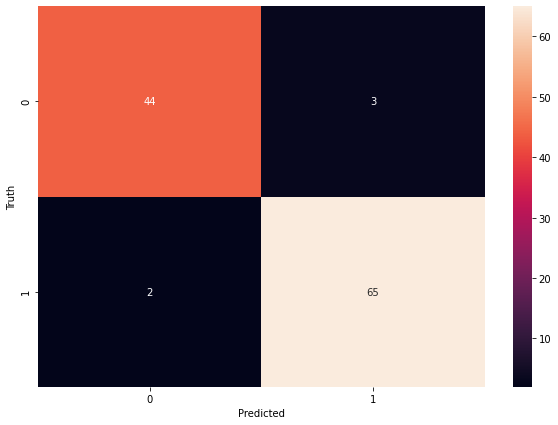

In [27]:
cm = confusion_matrix(y_true = y_test, y_pred = y_pred)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

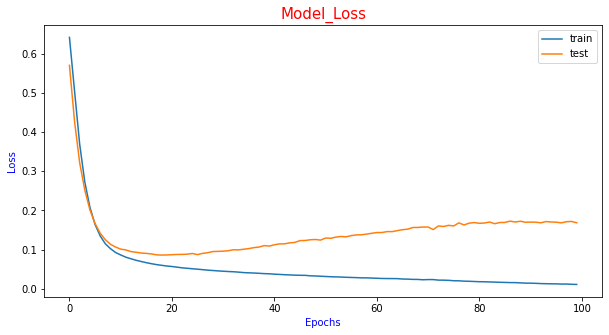

In [28]:
# plot loss during training
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Model_Loss',size = 15, color = 'r')
plt.xlabel('Epochs', size = 10, color = 'b')
plt.ylabel('Loss', size = 10, color = 'b')
plt.legend()
plt.show()

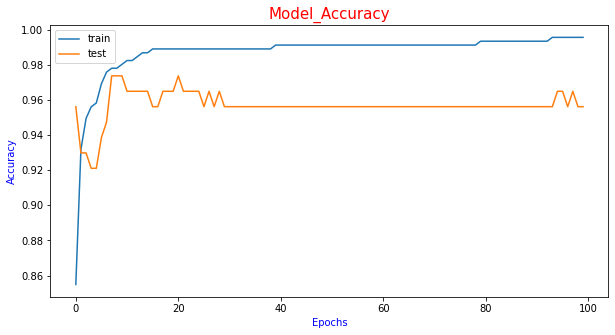

In [29]:
# plot Accuracy during training
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Model_Accuracy', size = 15, color= 'r')
plt.xlabel('Epochs', size = 10, color = 'b')
plt.ylabel('Accuracy', size = 10, color = 'b')
plt.legend()

# Thank You